# Spiral Experiment

The progressive learning package utilizes representation ensembling algorithms to sequentially learn a representation for each task and ensemble both old and new representations for all future decisions. 

Here, a specific arrangement of data is used to test the effectiveness of omnidirectional learning forests on this arrangement of data.

There are a few simple steps we'll take to implement this experiment.

### Function Import

First, we'll import the necessary packages and modules. The functions for this experiment in particular are stored in `functions/spiral_exp_functions.py`

In [1]:
import numpy as np

import functions.spiral_exp_functions as fn
from proglearn.sims import generate_spirals

### Data Creation

Now, we'll create our data. The data we're testing in this tutorial is sprial data. Which, as you'd expect, has clusters of points that are shaped in spirals. We denote an n-spiral as a spiral with n spokes.

In [2]:
spiral3, y_spiral3 = generate_spirals(750, 3, noise=0.8)
spiral5, y_spiral5 = generate_spirals(750, 5, noise=0.4)

Let's visualize our data before doing any learning. The `plot_spirals` function is perfect for doing this.

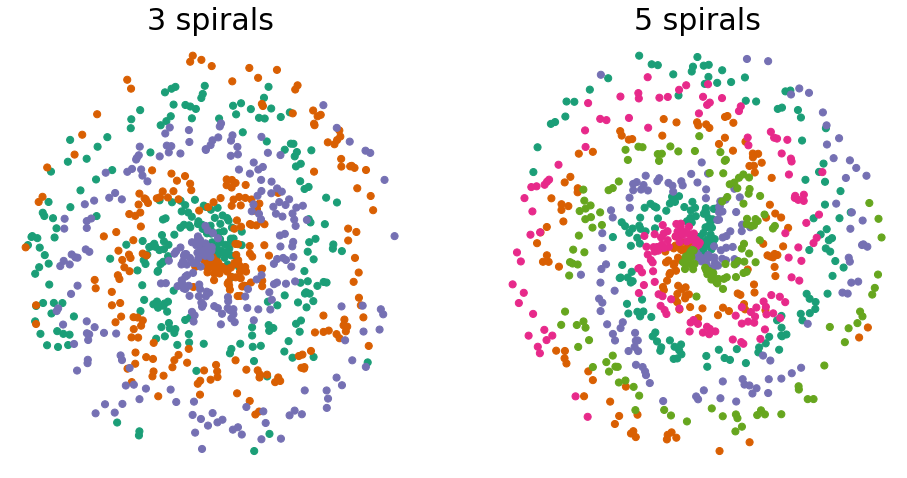

In [3]:
fn.plot_spirals(spiral3, y_spiral3, 3, spiral5, y_spiral5, 5)

### Training/Experiment

Now, we'll prepare to train and test our learner. 
We first declare the hyperparameters to be used for the experiment, which are as follows:
- `mc_rep`: number of repetitions to run the omnidirectional learning algorithm for. Use less reps if your computer has fewer cores.
- `n_test`: number of data points in the test set
- `n_trees`: number of trees
- `n_spiral3`: array containing number of 3-spiral data points fed to learner
- `n_spiral5`: array containing number of 5-spiral data points fed to learner

In [4]:
mc_rep = 1000
n_test = 1000
n_trees = 10
n_spiral3 = (100 * np.arange(0.5, 7.50, step=0.25)).astype(int)
n_spiral5 = (100 * np.arange(0.25, 7.50, step=0.25)).astype(int)

Now, we're ready to run the experiment. Since we're going to *run* the experiment, we'll use the `run` function. Intuitive, right?

In [5]:
mean_error, std_error, mean_te, std_te = fn.run(
    n_spiral3, n_spiral5, mc_rep, n_test, n_trees
)

What's the output you ask? Good question!
- `mean_error`: The mean values of the error
- `std_error`: The standard deviations of the error
- `mean_te`: The mean values of the transfer efficiency
- `std_te`: The standard deviations of the transfer efficiency

It would be convenient if there were a simple function to plot our results. Your wish is my command. We'll use `plot_results` to plot our results using the output of the `run` function and the size of the input data.

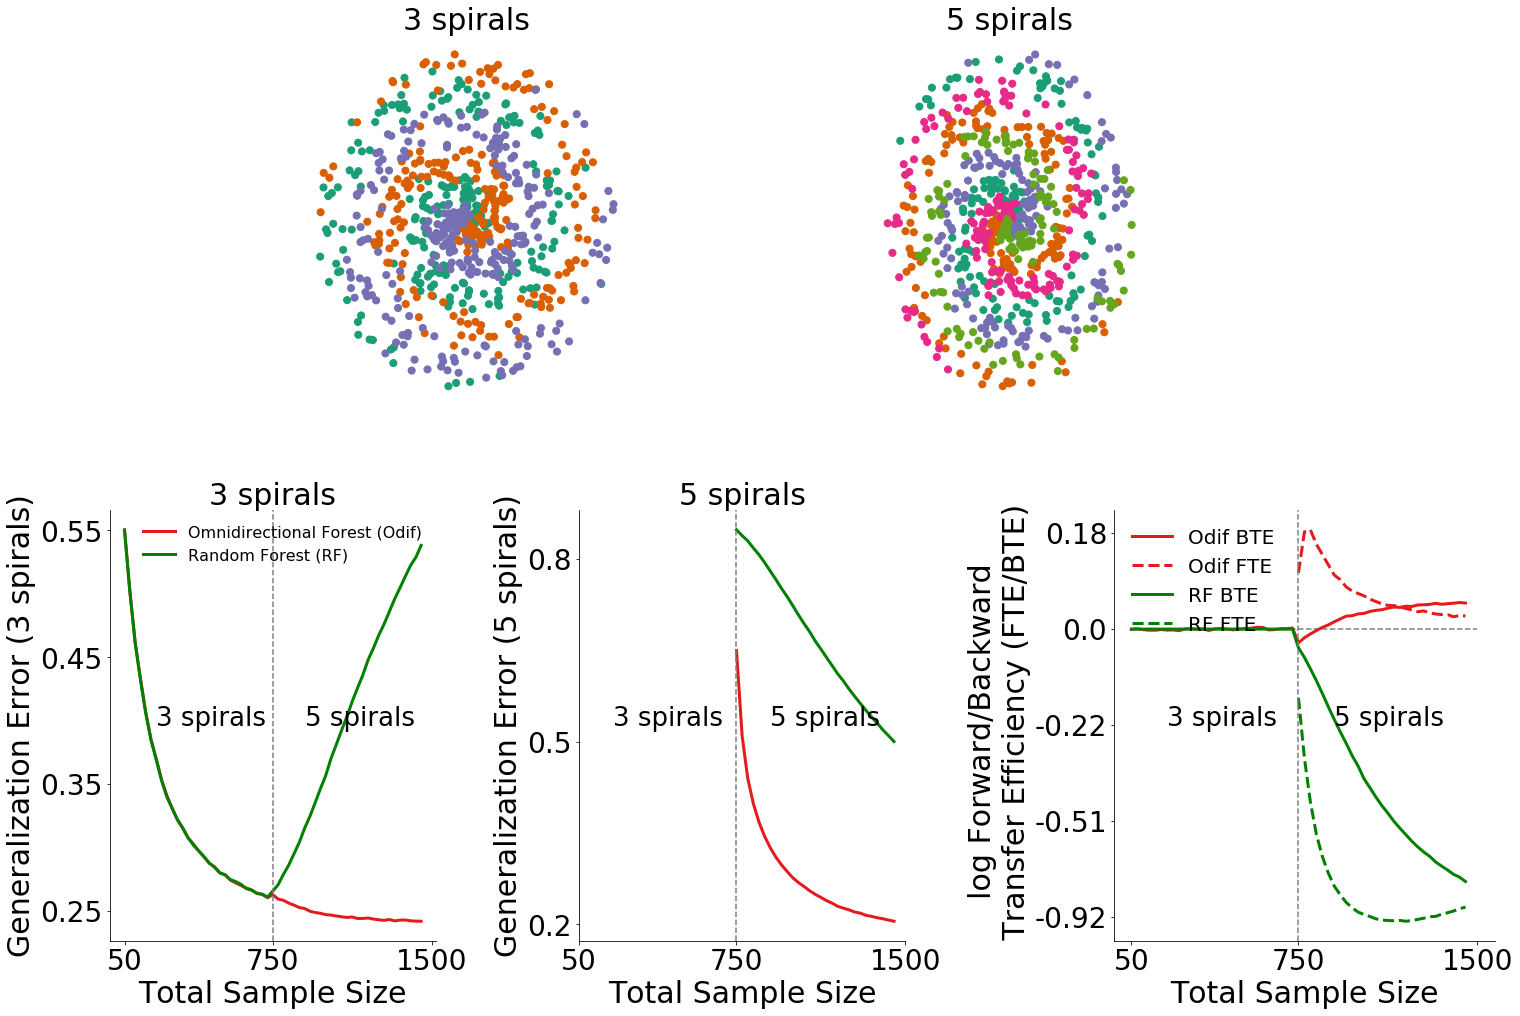

In [6]:
fn.plot_results(n_spiral3, n_spiral5, mean_error, std_error, mean_te, std_te)

### Results

#### Generalization Error for 3-spiral data (bottom left plot)

By plotting the generalization error for 3-spiral data, we can see how the 
introduction of 5-spiral data influenced the performance of both the omnidirectional forest and the random forest. 

In the bottom left plot, we see that when 5-spiral data is available, the omnidirectional forest outperforms random forests.

#### Generalization Error for 5-spiral data (bottom middle plot)

Similarly, by plotting the generalization error for 5-spiral data, we can also see how the presence of 5-spiral data influenced the performance of both algorithms. 

In the bottom middle plot, we see that given 5-spiral data is available, the progressive learning forest outperforms random forests on classifying 5-spiral data.

#### Transfer Efficiency for data (bottom right plot)

Given the generalization errors plotted above, we can find the transfer efficiency as a ratio of the generalization error for omnidirectional learning to random forests. The forward and backward transfer efficiencies are then plotted in the bottom right plot.

Omnidirectional learning forests demonstrate both positive forward and backward transfer in this environment, whereas this is not true for random forests

#### Voila! The spiral experiment is complete